# 02. Introduction to Artificial Neural Networks

## Overview  

- 2.1 Logical Computations with Neurons  
    - 2.1.1 The Perceptron  
    - 2.1.2 Multi-Layer Perceptron and Backpropagation  


- 2.2 Training an MLP with TensorFlow’s High-Level API  
- 2.3 Training a DNN Using Plain TensorFlow  
    - 2.3.1 Construction Phase
    - 2.3.2 Execution Phase  

## 2.1 Setup

In [26]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
from IPython.display import HTML

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import matplotlib.image as mpimg
def plot_external(img):
    img_name = os.path.join(".", "images",img)
    plots = mpimg.imread(img_name)
    plt.axis("off")
    plt.imshow(plots)    
    plt.show()

워렌 맥컬록(Walren McCulloch)과 월터 피츠(Walter Pitts)는 생물학적 뉴런 모델을 제안했는데 이 것이 나중에 인공 뉴런이 되었습니다. 이 모델은 하나 이상의 이진(on / off)입력과 하나의 이진 출력을 갖습니다. 인공 뉴런은 특정 수 이상의 입력이 활성화되었을 때 출력을 활성화합니다. McCulloch와 Pitts는 이런 단순화된 모델을 사용해도 원하는 모든 논리적 명제를 계산하는 인공 뉴런 네트워크를 구축하는 것이 가능하다는 것을 보여주었습니다. 

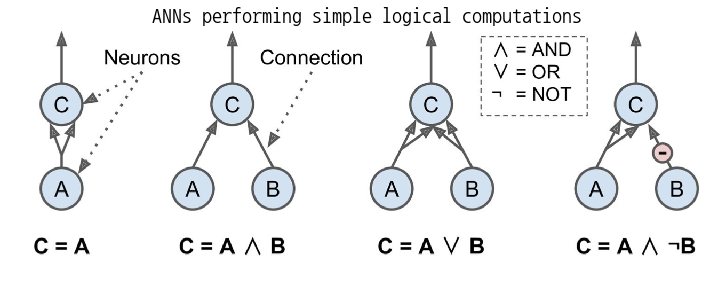

In [3]:
plt.figure(figsize=(12, 8))
plt.title("ANNs performing simple logical computations", fontsize=20)
plot_external("01.png")

- 왼쪽의 첫 번째 네트워크는 간단히 항등 함수입니다. 뉴런A가 활성화되면 뉴런C도 활성화됩니다 (뉴런A에서 두 개의 입력 신호를 받기 때문에). 그러나 뉴런A가 꺼지면 뉴런 C도 꺼집니다.  

- 두 번째 네트워크는 논리곱(AND)를 수행합니다. 뉴런C는 뉴런 A와 B가 활성화 된 경우에만 활성화됩니다.(단일 입력 신호로는 뉴런 C를 활성화하기에 충분하지 않습니다.)  

- 세 번째 네트워크는 논리합(OR)을 수행합니다. 뉴런 C는 뉴런A 또는 뉴런B가 활성화된 경우 활성화됩니다.  

- 마지막으로, 입력 연결이 뉴런의 활동(생물학적 뉴런의 경우)을 억제할 수 있다고 가정하면 네 번째 네트워크는 약간 더 복잡한 논리 명제를 계산합니다. 뉴런C가 활성화되면 뉴런A가 활성화되고 뉴런B 꺼져있습니다. 뉴런A가 항상 활성화되어 있으면 논리적 NOT을 얻습니다. 즉 뉴런B가 꺼져있을 때 뉴런C가 활성화되고 반대의 경우도 마찬가지입니다.

<br>
<br>

### 2.1.1 The Perceptron

**Perceptron**은 Frank Rosenblatt가 1957년에 발명한 가장 단순한 ANN 아키텍처 중 하나입니다. 퍼셉트론은 **TLU**(threshold logic unit)라 고하는 약간 다른 인공 뉴런을 기반으로합니다. 입력 및 출력은 이제 숫자가 되고(이진 on/off 값 대신)각 입력 연결은 가중치와 연결됩니다. TLU는 입력의 가중치 합을 계산하고 $(z = w_{1}x_{1}+ w_{1}x_{1} + \cdots + w_{1}x_{1} = \mathbf{w}^{T} \cdot \mathbf{x})$, 그 다음 계산된 합에 계단 함수(step function)를 적용하여 결과를 출력합니다. 
$h_{w}(\mathbf{x}) = step(z) = step( \mathbf{w}^{T}\cdot \mathbf{x} )$입니다.

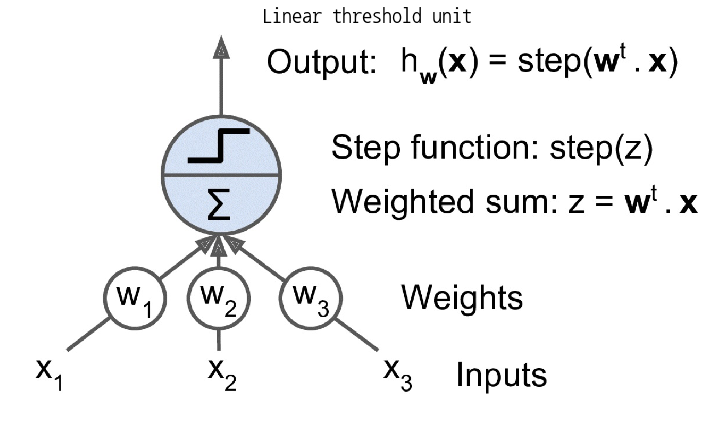

In [4]:
plt.figure(figsize=(12, 8))
plt.title("Linear threshold unit", fontsize=20)
plot_external("02.png")

퍼셉트론에서 사용되는 가장 일반적인 스텝 함수는 Heaviside 스텝 함수입니다. 때때로 sign 함수가 대신 사용됩니다.

$$
heaviside(z) \,=\, \begin{cases}  
0 \qquad if \;z \,<\,0\\
1 \qquad if \;z \,\ge\,0
\end{cases} \qquad \qquad sign(z)\,=\, 
\begin{cases}
-1 \qquad if\; z \,<\,0\\
0 \qquad \;\, if\; z \,=\,0\\
+1 \quad \, \; \; if\;z \,>\,0 
\end{cases}
$$

단일 선형 이진 분류에 단일 TLU를 사용할 수 있습니다. (Logistic Regression 분류기 또는 선형 SVM과 같은)입력의 선형 조합을 계산하고 결과가 임계값을 초과하면 양수 클래스를 출력하거나 그렇지 않으면 음수 클래스를 출력합니다. 예를 들어, 단일 TLU를 사용하여 꽃잎의 길이와 너비를 기반으로 붓꽃을 분류 할 수 있습니다.(편향 특성 기능 $x_0 = 1$ 추가). TLU를 훈련한다는 것은 $w_0$, $w_1$ 및 $w_2$에 대한 올바른 값을 찾는 것을 의미합니다.  

퍼셉트론은 TLU의 단일 층으로 구성되며, 각 입력에는 모든 뉴런이 연결됩니다. 이러한 연결은 종종 입력 뉴런이라고하는 특수한 통과 뉴런을 사용하여 표현됩니다. 또한 추가 바이어스 특성이 일반적으로 추가됩니다.($x_0 = 1$) 이 편향 특성은 일반적으로 항상 1을 출력하는 편향 뉴런이라는 특별한 유형의 뉴런을 사용하여 표현됩니다.  

아래 그림은 두 개의 입력과 세 개의 출력을 갖는 퍼셉트론을 나타냅니다. 이 퍼셉트론은 샘플을 세 가지 다른 이진 클래스로 분류 할 수 있으므로 다중 출력 분류기입니다.

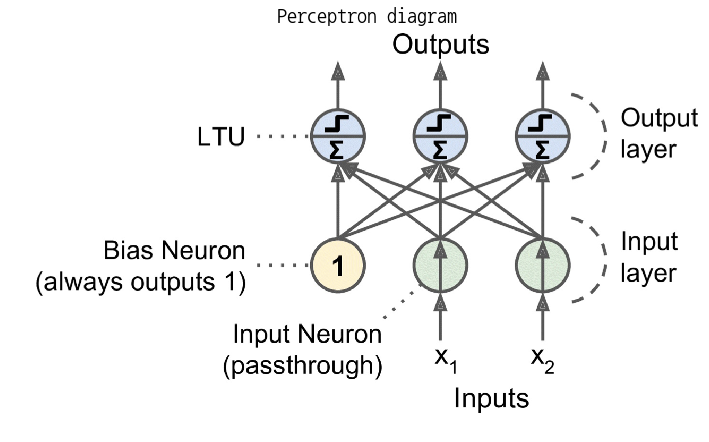

In [5]:
plt.figure(figsize=(12, 8))
plt.title("Perceptron diagram", fontsize=20)
plot_external("03.png")

Frank Rosenblatt가 제안한 Perceptron 훈련 알고리즘은 Hebb의 규칙에 크게 영향을 받았습니다. Donald Hebb는 생물학 뉴런이 종종 다른 뉴런을 유발할 때이 두 뉴런 사이의 연결이 강하게 성장한다고 1949년에 발표된 그의 책 The Behavior of Organisation에서 제안했습니다. 이 아이디어는 후에 Siegrid Löwel에 의해 다음과 같이 요약됩니다 : "서로 활성화되는 세포가 서로 연결된다."이 규칙은 후에 Hebb의 규칙 (또는 Hebbian 학습)으로 알려지게 되었습니다. 즉, 동일한 출력을 가질 때마다 두 뉴런 간의 연결 가중치가 증가합니다. 퍼셉트론은 네트워크에 의한 오류를 고려한이 규칙의 변형을 사용하여 훈련됩니다. 잘못된 출력으로 연결되는 연결을 보강하지 않습니다. 보다 구체적으로 말하면, 퍼셉트론은 한 번에 하나의 훈련 샘플로 공급되며, 각 샘플에 대해 예측을합니다. 잘못된 예측을 산출한 모든 출력 뉴런에 대해 올바른 예측에 기여한 입력으로부터 연결 가중치를 강화합니다. 

**퍼셉트론 학습 규칙**  
$$
{w_{i,\, j}}^{(next\,step)} = w_{i,\, j} + \eta(y_{j} - \hat{y}_j)x_{i}
$$  

- $w_{i,\,j}$는 $i$번째 입력 뉴런과 $j$번째 출력 뉴런 사이를 연결하는 가중치  
- $x_{i}$는 현재 훈련 샘플의 $i$번째 뉴런의 입력값  
- $\hat{y}_{j}$는 현재 훈련 샘플의 $j$번째 출력 뉴런의 출력값  
- $y_{j}$는 현재 훈련 샘플의 $j$번째 출력 뉴런의 타깃값  
- $\eta$는 학습률  

각 출력 뉴런의 결정 경계는 선형이므로 Perceptron은 복잡한 패턴을 학습할 수 없습니다.(Logistic Regression 분류기와 유사) 그러나 훈련 샘플이 선형적으로 분리 가능한 경우 Rosenblatt는이 알고리즘이 솔루션에 수렴한다는 것을 입증했습니다. 이 것을 퍼셉트론 수렴 정리(Perceptron convergence theorem)라고합니다.

Scikit-Learn은 단일 TLU 네트워크를 구현하는 Perceptron 클래스를 제공합니다. 예를 들어 붓꽃 데이터 세트에서 예상대로 사용할 수 있습니다.  

In [6]:
import numpy as np 
from sklearn.datasets import load_iris 
from sklearn.linear_model import Perceptron

iris = load_iris() 
X = iris.data[:, (2, 3)] # petal length, petal width 
y = (iris.target == 0).astype(np.int) # Iris Setosa?

per_clf = Perceptron(random_state=42) 
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

/home/ururu/.conda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([1])

Perceptron 학습 알고리즘은 Stochastic Gradient Descent와 매우 유사합니다. 실제로 Scikit-Learn의 Perceptron 클래스는 다음과 같은 하이퍼 매개 변수와 함께 SGDClassifier를 사용하는 것과 같습니다.

``` python
loss = "perceptron", learning_rate = "constant", eta0 = 1(학습비율), penalty = None(정규화 없음) ## ==> SGDClassifier와 같음  
```

로지스틱 회귀 분류기와 달리, 퍼셉트론은 클래스 확률을 출력하지 않습니다. 오히려, 단지 임계값을 기반으로 예측을합니다. 이런 이유로 Perceptron 보다 Logistic Regression을 선호합니다.  

"Perceptrons"라는 제목의 1969년 논문에서 Marvin Minsky와 Seymour Papert는 Perceptrons의 심각한 약점, 특히 사소한 문제(예 : Exclusive OR (XOR) 분류 문제)를 해결할 수 없다는 사실을 강조했습니다. 아래 그림 참조). 물론 이 것은 다른 선형 분류 모델(Logistic Regression 분류기)에서도 마찬가지이지만 연구원은 Perceptrons에서 훨씬 더 많은 것을 기대했으며 실망감이 컸습니다.   

그러나, 여러 가지 퍼셉트론을 쌓음으로써 퍼셉트론의 한계 중 일부를 제거 할 수 있음이 밝혀졌습니다. 이런 인공 신경망을 MLP(Multi-Layer Perceptron)라고합니다. 특히 MLP는 입력의 각 조합에 대해 MLP의 출력을 계산하여 확인할 수 있으므로 XOR 문제를 해결할 수 있습니다. 입력 (0, 0) 또는 (1, 1)때는 출력이 0이고, 입력 (0, 1) 또는 (1, 0)일 때는 출력이 1입니다.

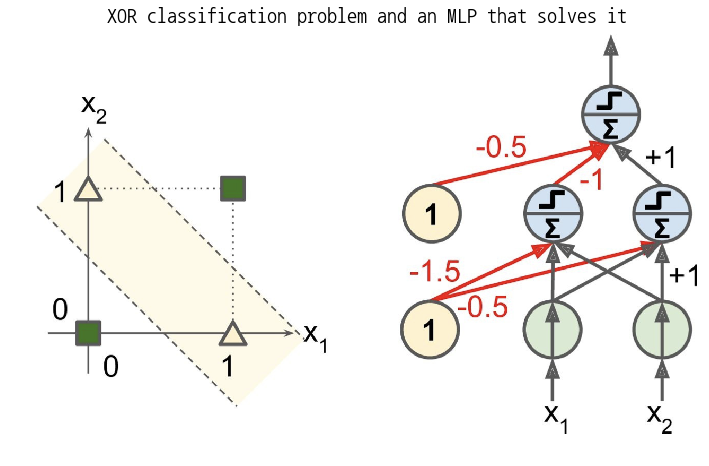

In [7]:
plt.figure(figsize=(12, 8))
plt.title("XOR classification problem and an MLP that solves it", fontsize=20)
plot_external("04.png")

### 2.1.2 Multi-Layer Perceptron and Backpropagation

MLP는 하나의 (패스 스루) 입력 레이어, 숨겨진 레이어라고하는 하나 이상의 LTU 레이어 및 출력 레이어라고하는 LTU의 최종 레이어로 구성됩니다 (그림 10-7 참조). 출력 레이어를 제외한 모든 레이어는 바이어스 뉴런을 포함하고 다음 레이어에 완전히 연결됩니다. ANN에 두 개 이상의 숨겨진 레이어가있는 경우이를 DNN (Deep Neural Network)이라고합니다.

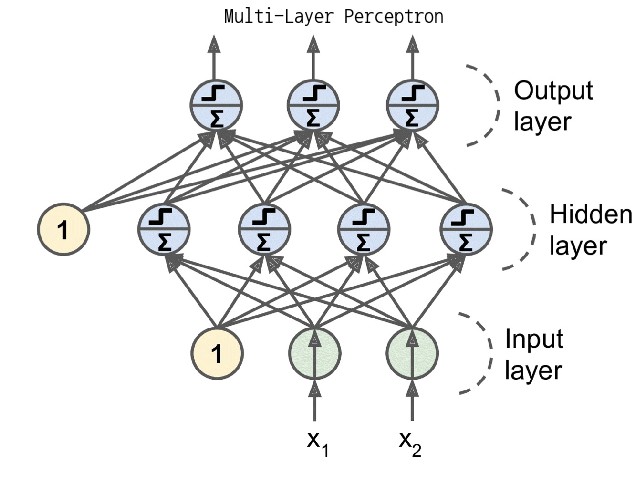

In [8]:
plt.figure(figsize=(12, 8))
plt.title("Multi-Layer Perceptron", fontsize=20)
plot_external("05.png")

수년동안 연구자들은 성공하지 못하고 MLP를 훈련시키는 방법을 찾는데 어려움을 겪었습니다. 그러나 1986년 backpropagation 훈련 알고리즘을 도입한 획기적인 논문을 발표했습니다. 오늘날 우리는 reverse-mode autodiff를 사용하여 Gradient Descent로 설명할 것입니다.  

알고르지ㅡㅁ이 각 훈련 샘플을 네트워크에 주입하고 연속되는 각 층의 뉴런마다 출력을 계산합니다.(예측을 만들 때와 마찬가지로 정방향입니다). 그런 다음 네트워크의 출력 오류(즉, 원하는 출력과 네트워크의 실제 출력 간의 차이)를 측정하고 마지막 숨겨진 계층의 각 뉴런이 각 출력 뉴런의 오류에 기여한 정도를 계산합니다. 그런 다음 이전의 숨겨진 레이어의 각 뉴런에서 발생한 오류 기여도가 얼마나되는지 측정합니다. 알고리즘이 입력 레이어에 도달 할 때까지 계속됩니다. 이 역방향은 네트워크에서 오류 그레디언트를 역방향으로 전파함으로써 네트워크의 모든 연결 가중치에 대한 그레디언트를 효율적으로 측정합니다. 역전파 알고리즘의 마지막 단계는 앞에서 측정한 오류 기울기를 사용하여 네트워크의 모든 연결 가중치에 대한 Gradient Descent 단계입니다.  

이를 더 짧게 만들어 보겠습니다. 각 학습 샘플에 대해 역전파 알고리즘은 먼저 예측(순방향 전달)을 수행하고 오류를 측정 한 다음 각 계층을 거쳐 각 연결(역방향)에서 오류 기여도를 측정하고 마지막으로 약간 조정합니다.  

계단 함수에는 수평선밖에 없으니 계산할 그래디언트가 없습니다.(경사하강법은 평편한 곳을 이동할 수 없습니다.) 반면 로지스틱 함수는 어디서든지 0이 아닌 그래디언트가 잘 정의되어 있습니다. 역전파 알고리즘은 로지스틱 함수대신 다른 활성화함수와도 사용될 수 있습니다. 널리 쓰이는 두 개의 다른 활성화 함수는 다음과 같습니다.

쌍곡선 탄젠트 함수  
- tanh(z) = $2\sigma(2z) - 1$  

로지스틱 함수처럼 이 함수도 S자 모양이고 연속적이며 미분 가능합니다. 하지마 출력 범위가 -1에서 1사이입니다.(로지스틱 함수는 0에서 1사이입니다.) 그래서 훈련 초기에 각 층의 출력이 다소 정규화되는 경향이 있습니다.(즉 원줌 주위로 몰리게 됩니다.)이는 종종 빠르게 수렴되도록 합니다.

- ReLU 기능  

ReLU(z) = max(0, z). 이 함수는 연속적이지만 불행히도 $z$ = 0에서 미분 가능하지 않습니다.(기울기가 갑자기 변화하여 그라디언트 하강이 엉뚱한 곳으로 튈 수 있습니다). 그러나 실제로는 매우 잘 작동하며 계산 속도가 빠르다는 이점이 있습니다. 무엇보다 최대값을 가지고 있지 않다는 사실은 경사 하강 동안 일부 문제를 줄이는 데 도움이됩니다.   

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

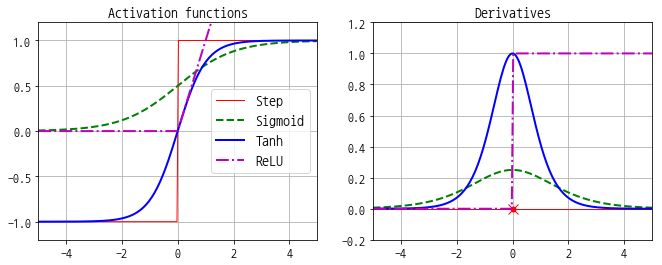

In [10]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

MLP는 종종 분류에 사용되며 각 출력은 다른 이진 클래스(예 : 스팸/햄, 긴급/비 긴급 등)에 해당합니다. 클래스가 베타적이면(예 : 숫자 이미지 분류의 경우 클래스 0 ~ 9), 출력은 일반적으로 개별 활성화 함수를 softmax 함수로 대체하여 수정됩니다. softmax함수는 각 뉴런의 출력을 해당 클래스의 예상 확률에 매핑합니다. 신호는 입력에서 출력으로 한 방향으로만 흐릅니다. 따라서이 아키텍처는 FNN(Feedforward Neural Network)의 예입니다.

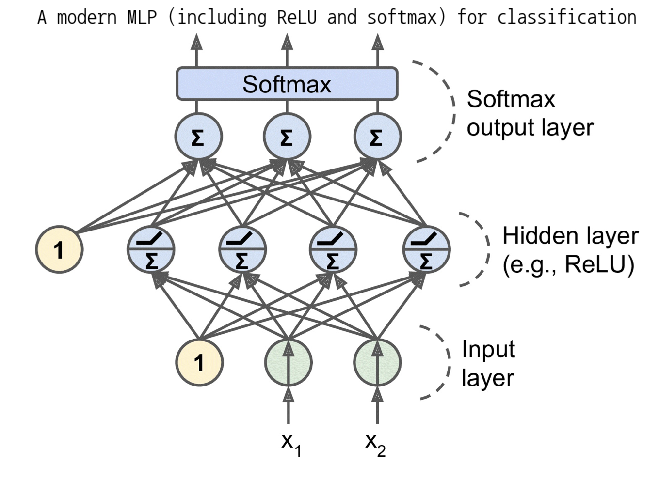

In [11]:
plt.figure(figsize=(12, 8))
plt.title("A modern MLP (including ReLU and softmax) for classification", fontsize=20)
plot_external("06.png")

## 2.2 Training an MLP with TensorFlow’s High-Level API

TensorFlow를 사용하여 MLP를 학습하는 가장 간단한 방법은 Scikit-Learn의 API와 매우 유사한 고급 API TF.Learn을 사용하는 것입니다. DNNClassifier 클래스는 임의의 수의 숨겨진 레이어가있는 심층 신경 네트워크를 학습하고, softmax 출력 레이어를 사용하여 예상되는 클래스 확률을 산출하는 것을 쉽게 만듭니다. 예를 들어, 다음 코드는 두 개의 숨겨진 레이어 (하나는 300 개의 뉴런이 있고 다른 하나는 100 개의 뉴런)와 10 개의 뉴런이있는 softmax 출력 레이어로 분류되도록 DNN을 교육합니다.

In [12]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [13]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp9f38rexx', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f02b58f3dd8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.

In [14]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-07-07T07:40:40Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmp9f38rexx/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-07-07-07:40:40
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9798, average_loss = 0.10514706, global_step = 44000, loss = 13.309754
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: /tmp/tmp9f38rexx/model.ckpt-44000


In [15]:
eval_results

{'accuracy': 0.9798,
 'average_loss': 0.10514706,
 'loss': 13.309754,
 'global_step': 44000}

In [16]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp9f38rexx/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([ -5.1350517 ,   0.48981336,  -1.7581481 ,   1.1591046 ,
         -3.0945382 , -11.0816345 , -17.154814  ,  28.43004   ,
         -4.6050706 ,   7.5216284 ], dtype=float32),
 'probabilities': array([2.6476763e-15, 7.3402927e-13, 7.7524020e-14, 1.4334527e-12,
        2.0372752e-14, 6.9230658e-18, 1.5949585e-20, 1.0000000e+00,
        4.4981490e-15, 8.3098206e-10], dtype=float32),
 'class_ids': array([7]),
 'classes': array([b'7'], dtype=object)}

## 2.3 Training a DNN Using Plain TensorFlow

네트워크 아키텍처를 보다 잘 제어하려면 TensorFlow의 하위 레벨 Python API를 사용하는 것이 좋습니다. 이제 API를 사용하기 전과 동일한 모델을 구축하고 Mini-batch Gradient Descent를 구현하여 MNIST 데이터 세트에서 이를 학습합니다. 첫 번째 단계는 TensorFlow 그래프를 작성하는 구축 단계입니다. 두 번째 단계는 실제로 그래프를 실행하여 모델을 학습하는 실행 단계입니다.

### 2.3.1 Construction Phase

입력 및 출력의 개수를 지정하고 각 계층에서 hidden 뉴런 수를 설정해야합니다.

In [41]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [42]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

실행 단계에서 한 번에 하나의 훈련 배치로 대체됩니다 (훈련 배치의 모든 샘플은 신경 네트워크에 의해 동시에 처리됩니다). 이제 두 개의 숨겨진 레이어와 출력 레이어를 만들어야합니다. 두 개의 숨겨진 레이어는 거의 동일합니다. 연결되는 입력과 포함된 뉴런의 수에 따라 다릅니다. 출력 계층도 매우 유사하지만 ReLU 활성화 기능 대신 softmax 활성화 기능을 사용합니다. 한 번에 하나의 레이어를 만드는 데 사용할 neuron_layer () 함수를 만듭니다. 입력, 뉴런 수, 활성화 함수 및 레이어 이름을 지정하는 매개 변수가 필요합니다.

In [31]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

1. 먼저 레이어의 이름을 사용하여 이름 범위를 만듭니다.이 레이어는이 뉴런 레이어의 모든 계산 노드를 포함합니다. 선택 사항이지만 TensorBoard의 노드가 잘 구성되어 있으면 그래프가 훨씬 더 멋지게 보입니다.

2. 다음으로 입력 행렬의 모양을 찾고 두 번째 차원의 크기를 가져 와서 입력 수를 얻습니다. (첫 번째 차원은 샘플의 수입니다).

3. 다음 세 행은 가중치 행렬을 보유할 $\mathbf{W}$ 변수를 작성합니다. 각 입력과 각 뉴런 사이의 모든 연결 가중치를 포함하는 2D 텐서가됩니다. 따라서 그 모양은 (n_inputs, n_neurons)가됩니다. 이 행렬은 표준편차가 $\frac{2}{\sqrt{n_{inputs} + n_{neurons}}}$ 인 가우시안분포를 사용해 무작위로 초기화됩니다. 이 표준편차를 사용하면 알고리즘이 훨씬 빠르게 수렴합니다. 경사 하강법 알고리즘이 중단되지 않도록 대칭성을 피하기 위해 모든 은닉층의 가중치는 무작위로 초기화하는 것이 중요  

4. 다음 줄은 뉴런마다 하나의 편향을 갖도록 변수 b를 만들고 0으로 초기화됩니다.  

5. 그런 다음 $\mathbf{Z} = \mathbf{X}\cdot\mathbf{W} + \mathbf{b}$를 계산하기위한 그래프를 만듭니다. 이 벡터화 된 구현은 층에 있는 모든 뉴런과 배치에 있는 모든 샘플에 대해 입력에 대한 가중치 합에 편향을 더하는 계산을 효율적으로 한번에 수행합니다. 
$\mathbf{X}\cdot\mathbf{W}$의 결과인 2D행렬에 열의 갯수와 같은 1D배열을 더하면 모든 행에 1D 배열이 더해지게 됩니다. 이를 **브로드캐스팅**이라고 합니다.  

6. 마지막으로 `tf.nn.relu`와 같은 activation 매개변수가 지정되어 있으면 activation(Z)(즉, max(0, $\mathbf{Z}$))를 반환하고, 그렇지 않으면 그냥 Z를 반환합니다.

이제는 뉴런 레이어를 만드는 함수가 생겼습니다. 첫 번째 숨겨진 레이어는 X를 입력으로 사용합니다. 두 번째는 첫 번째 숨겨진 레이어의 출력을 입력으로 받습니다. 마지막으로 출력 레이어는 두 번째 숨겨진 레이어의 출력을 입력으로 사용합니다.

In [44]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

여기서도 이름 범위를 사용해 정리했습니다. logits는 소프트맥스 활성화 함수로 들어가서 **직전의**신경망 출력입니다. 최적화 작업 때문에 소프트맥스 계산은 나중에 처리하겠습니다.  

예상했깄지만 텐서플로에는 표준 신경망 층을 만드는 편리한 함수가 많이 있습니다. 그래서 앞에서처럼 따로 neuron_layer()함수를 정의할 필요가 없습니다. 텐서플로의 tf.layers.dense() 함수(이전에는 `tf.contrib.layers.fully_connected()`였습니다)는 모든 입력이 은닉층에 있는 모든 뉴런과 연결된 완전 연결층(fully_connected layer)을 만듭니다. 이 함수는 적절한 초기화 방식을 사용해 kernel과 bias라는 이름으로 가중치와 편향 변수를 만듭니다. 그리고 activation 매개변수로 활성화 함수를 지정할 수 있습니다. 위 코드를 아래로 바꿀 수 있습니다.

In [63]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [64]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [65]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

이제 신경망 모델이 준비되었으니 훈련에 사용할 비용 함수를 정의해야 합니다. 크로스 엔트로피를 사용하겠습니다. 크로스 엔트로피는 모델이 타깃 클래스에 대해 낮은 확률을 추정하지 않도록 제약을 가합니다. 텐서플로는 크로스 엔트로피를 계산하기 위한 함수를 여러 개 제공합니다. 여기서는 `sparse_softmax_cross_entropy_with_logits()` 함수를 사용하겠습니다. 이 함수는 로짓(logits, 즉 소프트맥스 활성화 함수로 들어가기 전의 네트워크 출력)을 기반으로 크로스 엔트로피를 계산합니다. 그리고 0에서 '클래스 수 -1'사이 (여기서는 0에서 9사이)의 정수로 된 레이블을 기대합니다. 이 함수는 각 샘플에 대한 크로스 엔트로피를 담은 1D 텐서를 반환합니다. 그런 다음 텐서플로의 `reduce_mean()` 함수를 사용하여 모든 샘플에 대한 크로스 엔트로피 평균을 계산합니다.  

`sparse_softmax_cross_entropy_with_logits()` 함수는 softmax 활성화 함수를 적용한 다음 크로스 엔트로피를 계산하는 것과 동일합니다. logits이 커지면 부동소수점 반올림 오차로 소프트맥스 출력이 0 또는 1이 될 수 있습니다. 이런 경우 크로스 엔트로피 함수 공식에 음의 무한대가 되는 $log(0)$이 포함됩니다. `sparse_softmax_cross_entropy_with_logits()` 함수는 작은 양수 $\varepsilon$에 대한 log($\varepsilon$)을 계산함으로써 이 문제를 해결합니다. 다른 함수로는 (0에서 '클래스 수 -1' 사이의 숫자가 아니라) one-hot-vector형태로 레이블을 받는 `softmax_cross_entropy_with_logits()`도 있습니다.  

In [66]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

신경망 모델과 비용 함수가 준비되었으니 이제 `GradientDescentOptimizer()`를 사용해 이 비용 함수를 최소화시키도록 모델 파라미터를 조정해나갈 것입니다.

In [67]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [68]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

그리고 통상적으로 모든 변수를 초기화하는 노드를 만들고 훈련된 모델 파라미터를 디스크에 저장하기 위한 Saver 객체를 생성합니다.

In [69]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [70]:
n_epochs = 40
batch_size = 50

In [71]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [72]:
20 % 3

2

In [73]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        if epoch % 5== 0:
            print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./models/my_model_final.ckpt")

0 Batch accuracy: 0.9 Val accuracy: 0.9024
5 Batch accuracy: 0.94 Val accuracy: 0.951
10 Batch accuracy: 0.92 Val accuracy: 0.9658
15 Batch accuracy: 0.94 Val accuracy: 0.9722
20 Batch accuracy: 1.0 Val accuracy: 0.9748
25 Batch accuracy: 1.0 Val accuracy: 0.9762
30 Batch accuracy: 1.0 Val accuracy: 0.9774
35 Batch accuracy: 1.0 Val accuracy: 0.9778


- model 복원은 다음과 같이 진행합니다.

```python
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") 
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)
```

<br>
<br>

### 2.3.2 Execution Phase

- MNIST 데이터셋으로 실행 단계를 구축해보겠습니다.

In [89]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [90]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [91]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [92]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [93]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [94]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

그리고 통상적으로 모든 변수를 초기화하는 노드를 만들고 훈련된 모델 파라미터를 디스크에 저장하기 위한 Saver 객체를 생성합니다.

In [95]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [96]:
n_epochs = 40
batch_size = 50

In [97]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [98]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        if epoch % 5== 0:
            print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./models/iris/my_model_final.ckpt")

0 Batch accuracy: 0.9 Val accuracy: 0.9024
5 Batch accuracy: 0.94 Val accuracy: 0.951
10 Batch accuracy: 0.92 Val accuracy: 0.9658
15 Batch accuracy: 0.94 Val accuracy: 0.9722
20 Batch accuracy: 1.0 Val accuracy: 0.9748
25 Batch accuracy: 1.0 Val accuracy: 0.9762
30 Batch accuracy: 1.0 Val accuracy: 0.9774
35 Batch accuracy: 1.0 Val accuracy: 0.9778


In [99]:
from tensorflow_graph_in_jupyter import show_graph

In [100]:
show_graph(tf.get_default_graph())